In [45]:
import yt
import numpy as np
import unyt

In [46]:
ds = yt.load("parthenon.prim.00001.phdf")

yt : [INFO     ] 2023-10-17 16:07:21,355 Parameters: current_time              = 100.16124501218827
yt : [INFO     ] 2023-10-17 16:07:21,356 Parameters: domain_dimensions         = [ 64  64 128]
yt : [INFO     ] 2023-10-17 16:07:21,356 Parameters: domain_left_edge          = [ -50.  -50. -100.]
yt : [INFO     ] 2023-10-17 16:07:21,356 Parameters: domain_right_edge         = [ 50.  50. 100.]
yt : [ERROR    ] 2023-10-17 16:07:21,357 Missing cosmological_simulation in parameter file definition!


In [47]:
# compute histogram of dK/K
custom_bins = np.linspace(-1,1,40)
source = ds.all_data()
histogram = yt.data_objects.profiles.create_profile(source,
    [("parthenon", "z"), ("parthenon", "dK_over_K")],
    [("gas", "cell_mass")]
    , override_bins={("parthenon", "dK_over_K"): custom_bins, ("parthenon", "z"): None})

In [48]:
source[("parthenon","dK_over_K")].min(), source[("parthenon","dK_over_K")].max()

(unyt_quantity(-0.28854552, '(dimensionless)'),
 unyt_quantity(0.58564541, '(dimensionless)'))


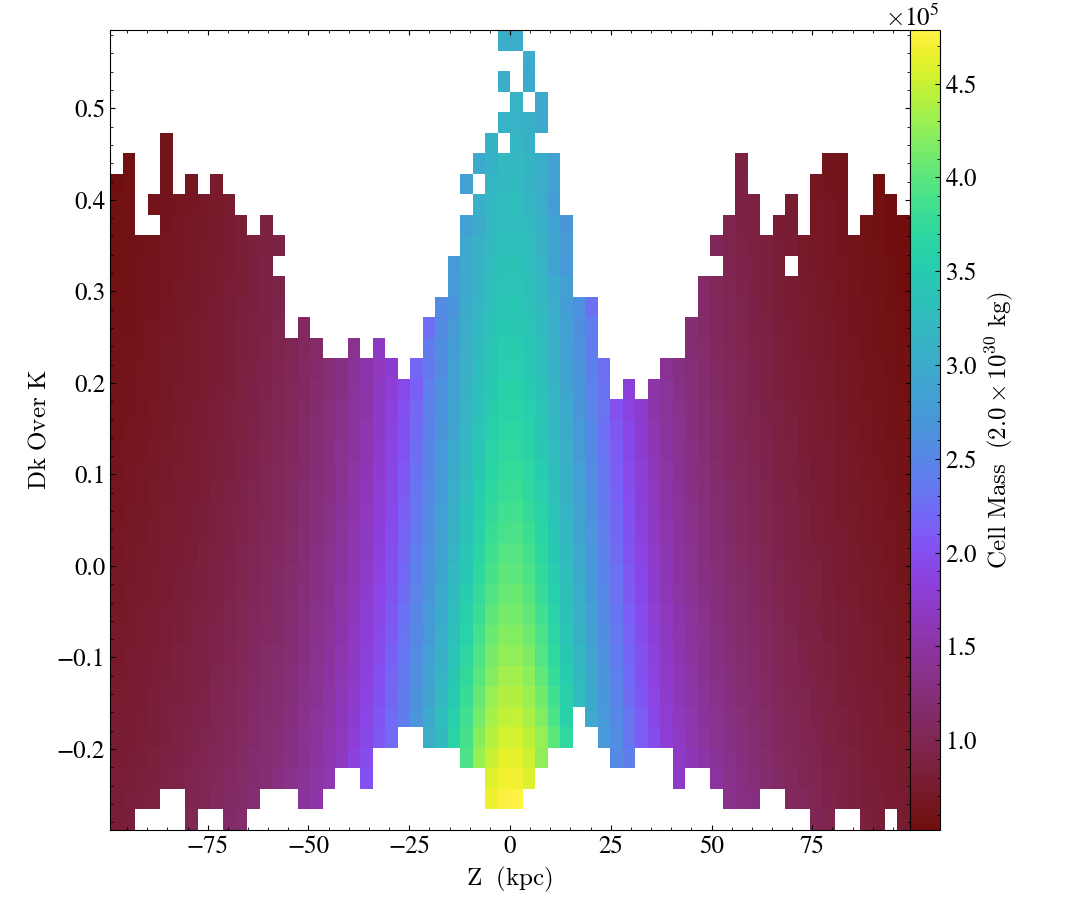

In [49]:
histogram.plot().set_log(("parthenon","dK_over_K"), False).set_log(("gas","cell_mass"), False).set_unit(("parthenon","z"), unyt.kpc).set_unit(("gas","cell_mass"),unyt.msun)